## DNA sequencing
### Lecture 1-2 example (filled)

Recall that in Lecture 1, we briefly saw the DNA sequencing problem and a way to approach it as an Eulerian path problem. Here, we use *networkx*, an excellent network analysis package, to solve this. 

See https://networkx.github.io for more details. Also see the `intro.ipynb` we have provided you with.

In one of the examples in class we had a set of subsequences:

In [24]:
subsequences = ['CAT' , 'ATT' , 'ATG', 'TAT' , 'TTG', 'TGC', 'TGT' , 'GTA']

First, we write a code that produces the graph (as discussed in class).

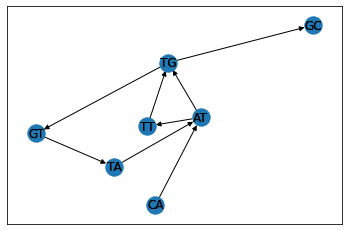

In [25]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def construct_graph_from(sub):
    G = nx.DiGraph()
    for i in sub:
        subseq1=i[0:2]
        subseq2=i[1:3]
        G.add_node(subseq1)
        G.add_node(subseq2)
    for (i,j) in combinations(G.nodes(),2):
        subseq1=str(i)
        subseq2=str(j)
        subseq=subseq1[0:2]+subseq2[1]  # string operations between say "CA"+"T" -> "CAT"
        if subseq1[1]==subseq2[0] and subseq in sub:
            G.add_edge(i,j)
        subseq=subseq2[0:2]+subseq1[1]
        if subseq2[1]==subseq1[0] and subseq in sub:
            G.add_edge(j,i)
    return G

G = construct_graph_from(subsequences) 
pos=nx.spring_layout(G) ## <- We can change this to other types of layouts, try some out yourselves
nx.draw_networkx(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

Now, we write a code to find an **Eulerian path**. Networkx has a function *eulerian_circuit(graph, source)* that we may use. However, it returns a cycle -- not a path. 

How can we turn our graph into one that has an Eulerian cycle? *Maybe* add an edge between the end node and the start node? And how can we find a suitable start node?

In [26]:
for i in G.nodes():
    if G.in_degree(i)<G.out_degree(i):
        start=i
    elif G.in_degree(i)>G.out_degree(i):
        stop=i

G.add_edge(stop, start)
cycle=list(nx.eulerian_circuit(G, start))
print(cycle)
DNA=[cycle[0][0]]
for i in range(1,len(cycle)):
    DNA.append(str(cycle[i][0][1])) ## Add 1st end ('CA', 'AT') 'T' or ('AT', 'TT') 'T'
print(''.join(DNA))

[('CA', 'AT'), ('AT', 'TT'), ('TT', 'TG'), ('TG', 'GT'), ('GT', 'TA'), ('TA', 'AT'), ('AT', 'TG'), ('TG', 'GC'), ('GC', 'CA')]
CATTGTATGC


In [110]:
subsequences_2 = ['GGT', 'GTC', 'TCC', 'CCC', 'CCT', 'CTC', 'TCG', 'CGC', 'GCC', 'CTA', 'TAA', 'AAC']

First, we write a code that produces the graph (as discussed in class).

When delete item is GGT:


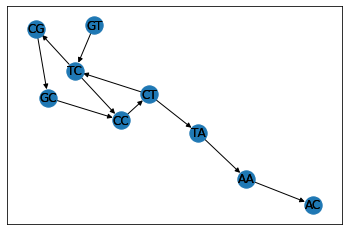

NetworkXError. Not delete 'GGT'
--------------------------------------------------
When delete item is GTC:


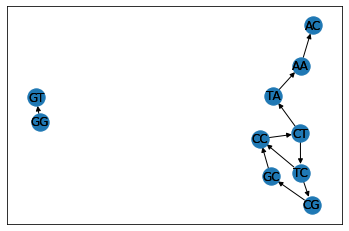

NetworkXError. Not delete 'GTC'
--------------------------------------------------
When delete item is TCC:


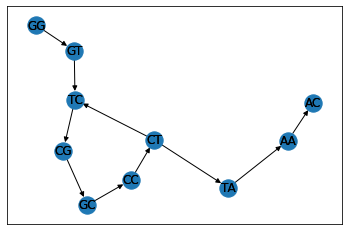

NetworkXError. Not delete 'TCC'
--------------------------------------------------
When delete item is CCC:


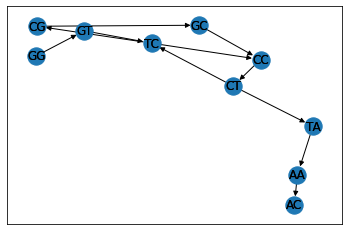

NetworkXError. Not delete 'CCC'
--------------------------------------------------
When delete item is CCT:


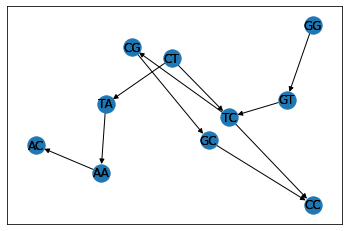

NetworkXError. Not delete 'CCT'
--------------------------------------------------
When delete item is CTC:


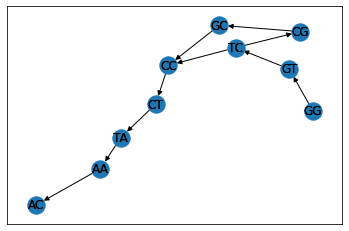

NetworkXError. Not delete 'CTC'
--------------------------------------------------
When delete item is TCG:


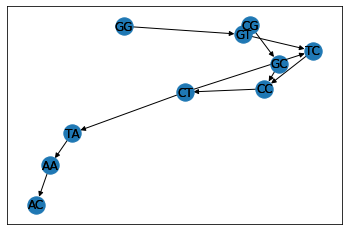

NetworkXError. Not delete 'TCG'
--------------------------------------------------
When delete item is CGC:


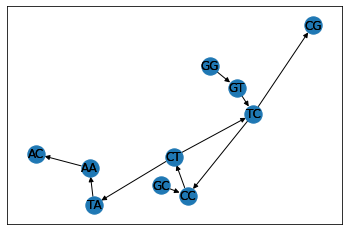

NetworkXError. Not delete 'CGC'
--------------------------------------------------
When delete item is GCC:


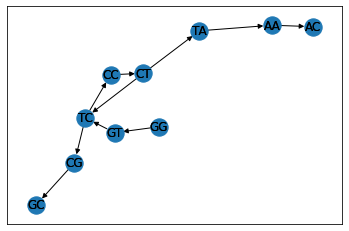

NetworkXError. Not delete 'GCC'
--------------------------------------------------
When delete item is CTA:


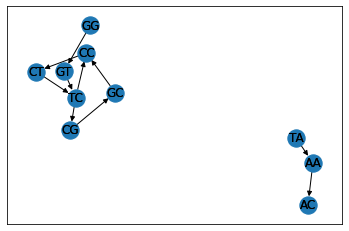

NetworkXError. Not delete 'CTA'
--------------------------------------------------
When delete item is TAA:


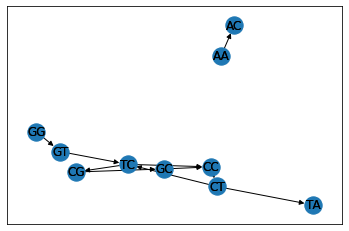

NetworkXError. Not delete 'TAA'
--------------------------------------------------
When delete item is AAC:


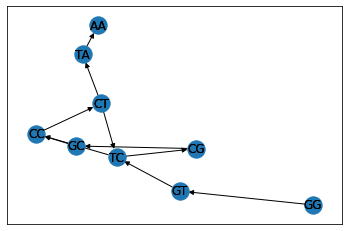

NetworkXError. Not delete 'AAC'
--------------------------------------------------


In [113]:
import copy
for item in range(len(subsequences_2)):
    subsequences_3 = copy.copy(subsequences_2)
    subsequences_3.pop(item)
    
    try:
        print("When delete item is {}:".format(subsequences_2[item]))
        G_2 = construct_graph_from(subsequences_3) 
        pos_2=nx.spring_layout(G_2) 
        nx.draw_networkx(G_2,pos_2)
        nx.draw_networkx_labels(G_2,pos_2)
        plt.show()
        
        for i in G_2.nodes():
            if G_2.in_degree(i) < G_2.out_degree(i):
                start = i
            elif G_2.in_degree(i) > G_2.out_degree(i):
                stop = i

        G_2.add_edge(stop, start)
        cycle_2=list(nx.eulerian_circuit(G_2, start))
        print(cycle_2)
        DNA_2 = [cycle_2[0][0]]
        for i in range(1,len(cycle_2)):
            DNA_2.append(str(cycle_2[i][0][1])) 
        print('The result is '.join(DNA_2))
        
    except nx.NetworkXError:
        print("\033[1m\033[91mNetworkXError.\033[0m Not delete '{}'".format(subsequences_2[item]))
        print("-"*50)
        
    
    

In [134]:
subsequences_3 = ['GGT', 'GTC', 'TCC', 'CCC', 'CCT', 'CTC', 'TCG', 'CGC', 'GCC', 'CTA', 'TAA', 'AAC']

In [140]:
subsequences_3 = ['GGT', 'GTC', 'TCC', 'CCC', 'CCT', 'CTC', 'TCG', 'CGC', 'GCC', 'CTA', 'TAA', 'AAC', 'CCK', 'CKR', 'KRC', 'RCT']

In [1]:
subsequences_3 = ['GGT', 'GTC', 'TCC', 'CCC', 'CCT', 'CTC', 'TCG', 'CGC', 'GCC', 'CTA', 'TAA', 'AAC', 'CCT']

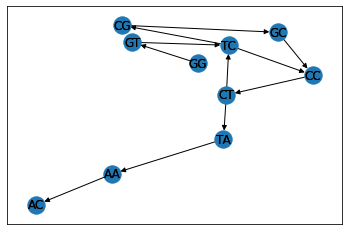

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

def construct_graph_from(sub):
    G = nx.DiGraph()
    for i in sub:
        subseq1=i[0:2]
        subseq2=i[1:3]
        G.add_node(subseq1)
        G.add_node(subseq2)
    for (i,j) in combinations(G.nodes(),2):
        subseq1=str(i)
        subseq2=str(j)
        subseq=subseq1[0:2]+subseq2[1]  # string operations between say "CA"+"T" -> "CAT"
        if subseq1[1]==subseq2[0] and subseq in sub:
            G.add_edge(i,j)
        subseq=subseq2[0:2]+subseq1[1]
        if subseq2[1]==subseq1[0] and subseq in sub:
            G.add_edge(j,i)
    return G

G_3 = construct_graph_from(subsequences_3) 
pos_3 = nx.spring_layout(G_3) ## <- We can change this to other types of layouts, try some out yourselves
nx.draw_networkx(G_3 ,pos_3)
nx.draw_networkx_labels(G_3,pos_3)
plt.show()

In [3]:
for i in G_3.nodes():
    if G_3.in_degree(i) < G_3.out_degree(i):
        start=i
    elif G_3.in_degree(i) > G_3.out_degree(i):
        stop=i

G_3.add_edge(stop, start)
cycle_3 = list(nx.eulerian_circuit(G_3, start))
print(cycle_3)
DNA_3=[cycle_3[0][0]]
for i in range(1,len(cycle_3)):
    DNA_3.append(str(cycle_3[i][0][1]))
print(''.join(DNA_3))

NetworkXError: G is not Eulerian.